In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from alpha_vantage.techindicators import TechIndicators
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report


import numpy as np



In [3]:
# Obtaining stock data from alpha vantage 
sym='AAPL'

date_of_data='2018-01-01'

def stock_data(sym):
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    return data_date_changed


# data_dated = pd.DataFrame(columns = column_names)


# for ticker in ticker_list:
#     data_dated = data_dated.append(stock_data(ticker), sort=False)


In [4]:
data_dated= stock_data(sym)

<ipython-input-3-d7ebbb0db26a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed['Ticker']= sym


In [5]:
data_dated.head(10)

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2021-03-11   122.54  123.210  121.26   121.960            121.960   
2021-03-10   121.69  122.170  119.45   119.980            119.980   
2021-03-09   119.03  122.060  118.79   121.085            121.085   
2021-03-08   120.93  121.000  116.21   116.360            116.360   
2021-03-05   120.98  121.935  117.57   121.420            121.420   
2021-03-04   121.75  123.600  118.62   120.130            120.130   
2021-03-03   124.81  125.710  121.84   122.060            122.060   
2021-03-02   128.41  128.720  125.01   125.120            125.120   
2021-03-01   123.75  127.930  122.79   127.790            127.790   
2021-02-26   122.59  124.850  121.20   121.260            121.260   

              6. volume  7. dividend amount  8. split coefficient Ticker  
date                                                                      
2021-03-11  103026514.0                 0.0                   1.0   AAPL  
2021-03-10  111943326.0                 0.0                   1.0   AAPL  
2021-03-09  129525780.0                 0.0                   1.0   AAPL  
2021-03-08  154376610.0                 0.0                   1.0   AAPL  
2021-03-05  153766601.0                 0.0                   1.0   AAPL  
2021-03-04  178154975.0                 0.0                   1.0   AAPL  
2021-03-03  112966340.0                 0.0                   1.0   AAPL  
2021-03-02  102260945.0                 0.0                   1.0   AAPL  
2021-03-01  116307892.0                 0.0                   1.0   AAPL  
2021-02-26  163424672.0                 0.0                   1.0   AAPL

In [6]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 10

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['4. close']].shift(-n)
  
  # return the new dataset 
  return data

In [7]:
df=data_dated.copy()

In [8]:
data_dated['change_in_price'] = data_dated['4. close'].diff()

In [9]:
# # getting the date of the previous day
# yday= date.today()- timedelta(1) 

# # technical indicators from alphavantage
# ti = TechIndicators(key = 'SUXOFAIGXM6HEP9Y', output_format = 'pandas')

# stockCCI, q = ti.get_cci(symbol = sym, interval = 'daily', time_period = 20)

# # resting index so that date is no longer the index
# stockCCI.reset_index(inplace = True) 

# # sorting date column in decending order
# stockCCI.sort_values(by=['date'], inplace=True, ascending=False)

# # filtering date 
# mask = (stockCCI['date'] > date_of_data) & (stockCCI['date'] <=pd.to_datetime(yday))

# stockCCI = stockCCI.loc[mask]


# stockCCI.head(20)

# #  resetting index 
# stockCCI.set_index('date', inplace=True)


# data_dated['CCI']= stockCCI[['CCI']].copy()


In [10]:
data_dated

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2021-03-11   122.54  123.210  121.26   121.960         121.960000   
2021-03-10   121.69  122.170  119.45   119.980         119.980000   
2021-03-09   119.03  122.060  118.79   121.085         121.085000   
2021-03-08   120.93  121.000  116.21   116.360         116.360000   
2021-03-05   120.98  121.935  117.57   121.420         121.420000   
...             ...      ...     ...       ...                ...   
2018-01-08   174.35  175.610  173.93   174.350          41.880094   
2018-01-05   173.44  175.370  173.05   175.000          42.036229   
2018-01-04   172.54  173.470  172.08   173.030          41.563021   
2018-01-03   172.53  174.550  171.96   172.230          41.370855   
2018-01-02   170.16  172.300  169.26   172.260          41.378062   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0                 0.0                   1.0   AAPL   
2021-03-09  129525780.0                 0.0                   1.0   AAPL   
2021-03-08  154376610.0                 0.0                   1.0   AAPL   
2021-03-05  153766601.0                 0.0                   1.0   AAPL   
...                 ...                 ...                   ...    ...   
2018-01-08   20134092.0                 0.0                   1.0   AAPL   
2018-01-05   23016177.0                 0.0                   1.0   AAPL   
2018-01-04   22211345.0                 0.0                   1.0   AAPL   
2018-01-03   28819653.0                 0.0                   1.0   AAPL   
2018-01-02   25048048.0                 0.0                   1.0   AAPL   

            change_in_price  
date                         
2021-03-11              NaN  
2021-03-10           -1.980  
2021-03-09            1.105  
2021-03-08           -4.725  
2021-03-05            5.060  
...                     ...  
2018-01-08            0.020  
2018-01-05            0.650  
2018-01-04           -1.970  
2018-01-03           -0.800  
2018-01-02            0.030  

[803 rows x 10 columns]

In [11]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((data_dated['4. close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
data_dated['low_14'] = low_14
data_dated['high_14'] = high_14
data_dated['k_percent'] = k_percent

# Display the head.
data_dated.head(5)

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2021-03-11   122.54  123.210  121.26   121.960            121.960   
2021-03-10   121.69  122.170  119.45   119.980            119.980   
2021-03-09   119.03  122.060  118.79   121.085            121.085   
2021-03-08   120.93  121.000  116.21   116.360            116.360   
2021-03-05   120.98  121.935  117.57   121.420            121.420   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0                 0.0                   1.0   AAPL   
2021-03-09  129525780.0                 0.0                   1.0   AAPL   
2021-03-08  154376610.0                 0.0                   1.0   AAPL   
2021-03-05  153766601.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  
date                                                     
2021-03-11              NaN     NaN      NaN        NaN  
2021-03-10           -1.980     NaN      NaN        NaN  
2021-03-09            1.105     NaN      NaN        NaN  
2021-03-08           -4.725     NaN      NaN        NaN  
2021-03-05            5.060     NaN      NaN        NaN

In [12]:
# Calculate the Williams %R
n = 14

# Make a copy of the high and low column.
low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

# Calculate William %R indicator.
r_percent = ((high_14 - data_dated['4. close']) / (high_14 - low_14)) * - 100

# Add the info to the data frame.
data_dated['r_percent'] = r_percent

# Display the head.
data_dated.head(5)

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2021-03-11   122.54  123.210  121.26   121.960            121.960   
2021-03-10   121.69  122.170  119.45   119.980            119.980   
2021-03-09   119.03  122.060  118.79   121.085            121.085   
2021-03-08   120.93  121.000  116.21   116.360            116.360   
2021-03-05   120.98  121.935  117.57   121.420            121.420   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0                 0.0                   1.0   AAPL   
2021-03-09  129525780.0                 0.0                   1.0   AAPL   
2021-03-08  154376610.0                 0.0                   1.0   AAPL   
2021-03-05  153766601.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  r_percent  
date                                                                
2021-03-11              NaN     NaN      NaN        NaN        NaN  
2021-03-10           -1.980     NaN      NaN        NaN        NaN  
2021-03-09            1.105     NaN      NaN        NaN        NaN  
2021-03-08           -4.725     NaN      NaN        NaN        NaN  
2021-03-05            5.060     NaN      NaN        NaN        NaN

In [13]:
# Calculate the MACD
ema_26 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
data_dated['MACD'] = macd
data_dated['MACD_EMA'] = ema_9_macd

# Print the head.
data_dated.head(5)

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2021-03-11   122.54  123.210  121.26   121.960            121.960   
2021-03-10   121.69  122.170  119.45   119.980            119.980   
2021-03-09   119.03  122.060  118.79   121.085            121.085   
2021-03-08   120.93  121.000  116.21   116.360            116.360   
2021-03-05   120.98  121.935  117.57   121.420            121.420   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0                 0.0                   1.0   AAPL   
2021-03-09  129525780.0                 0.0                   1.0   AAPL   
2021-03-08  154376610.0                 0.0                   1.0   AAPL   
2021-03-05  153766601.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  r_percent      MACD  \
date                                                                           
2021-03-11              NaN     NaN      NaN        NaN        NaN  0.000000   
2021-03-10           -1.980     NaN      NaN        NaN        NaN -0.044423   
2021-03-09            1.105     NaN      NaN        NaN        NaN -0.022338   
2021-03-08           -4.725     NaN      NaN        NaN        NaN -0.182340   
2021-03-05            5.060     NaN      NaN        NaN        NaN -0.064095   

            MACD_EMA  
date                  
2021-03-11  0.000000  
2021-03-10 -0.024679  
2021-03-09 -0.023720  
2021-03-08 -0.077453  
2021-03-05 -0.073479

In [14]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
data_dated['Price_Rate_Of_Change'] = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.pct_change(periods = n))

# Print the first 30 rows
data_dated.head(5)

1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2021-03-11   122.54  123.210  121.26   121.960            121.960   
2021-03-10   121.69  122.170  119.45   119.980            119.980   
2021-03-09   119.03  122.060  118.79   121.085            121.085   
2021-03-08   120.93  121.000  116.21   116.360            116.360   
2021-03-05   120.98  121.935  117.57   121.420            121.420   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0                 0.0                   1.0   AAPL   
2021-03-09  129525780.0                 0.0                   1.0   AAPL   
2021-03-08  154376610.0                 0.0                   1.0   AAPL   
2021-03-05  153766601.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  r_percent      MACD  \
date                                                                           
2021-03-11              NaN     NaN      NaN        NaN        NaN  0.000000   
2021-03-10           -1.980     NaN      NaN        NaN        NaN -0.044423   
2021-03-09            1.105     NaN      NaN        NaN        NaN -0.022338   
2021-03-08           -4.725     NaN      NaN        NaN        NaN -0.182340   
2021-03-05            5.060     NaN      NaN        NaN        NaN -0.064095   

            MACD_EMA  Price_Rate_Of_Change  
date                                        
2021-03-11  0.000000                   NaN  
2021-03-10 -0.024679                   NaN  
2021-03-09 -0.023720                   NaN  
2021-03-08 -0.077453                   NaN  
2021-03-05 -0.073479                   NaN

In [15]:
# # ***********************************ADX*******************************************************************
# stockAD, meta_data = ti.get_adx(symbol=sym, interval='daily', time_period=20)


# # resting index so that date is no longer the index
# stockAD.reset_index(inplace = True) 

# # sorting date column in decending order
# stockAD.sort_values(by=['date'], inplace=True, ascending=False)

# # filtering date 
# mask = (stockAD['date'] > date_of_data) & (stockAD['date'] <=pd.to_datetime(yday))

# stockAD = stockAD.loc[mask]


# stockAD.head(20)

# # resetting index 
# stockAD.set_index('date', inplace=True)


# data_dated['ADX']= stockAD[['ADX']].copy()
# # data_dated['SlowD']= stockAD[['SlowD']].copy()


In [16]:
/

()

In [17]:
# # ***********************************ROC*******************************************************************
# stockROC, meta_data = ti.get_roc(symbol=sym, interval='daily', time_period=20, series_type='close')

# # resting index so that date is no longer the index
# stockROC.reset_index(inplace = True) 

# # sorting date column in decending order
# stockROC.sort_values(by=['date'], inplace=True, ascending=False)


# # filtering date 
# mask = (stockROC['date'] > date_of_data) & (stockROC['date'] <=pd.to_datetime(yday))

# stockROC = stockROC.loc[mask]


# stockROC.head(20)

# # resetting index 
# stockROC.set_index('date', inplace=True)


# data_dated['ROC']= stockROC[['ROC']].copy()



In [18]:
# # obtaining  inidcator from alpha vantage
# stockRSI, meta_data= ti.get_rsi(symbol = sym, interval = 'daily',time_period = 20, series_type='close')

# # resting index so that date is no longer the index
# stockRSI.reset_index(inplace = True) 

# # sorting date column in decending order
# stockRSI.sort_values(by=['date'], inplace=True, ascending=False)

# # filtering date 
# mask = (stockRSI['date'] > date_of_data) & (stockRSI['date'] <=pd.to_datetime(yday))

# stockRSI = stockRSI.loc[mask]


# stockRSI.head(20)

# # resetting index 
# stockRSI.set_index('date', inplace=True)


# data_dated['RSI']= stockRSI[['RSI']].copy()


In [19]:
# # *****************************MACD*******************************************************************

# # obtaining MACD inidcator from alpha vantage
# stockMACD,q= ti.get_macd(symbol = sym, interval = 'daily', fastperiod = 12, slowperiod = 26, signalperiod = 9)

# # resting index so that date is no longer the index
# stockMACD.reset_index(inplace = True) 

# # sorting date column in decending order
# stockMACD.sort_values(by=['date'], inplace=True, ascending=False)


# # filtering date 
# mask = (stockMACD['date'] > date_of_data) & (stockMACD['date'] <=pd.to_datetime(yday))

# stockMACD = stockMACD.loc[mask]


# stockMACD.head(20)

# # resetting index 
# stockMACD.set_index('date', inplace=True)


# data_dated['MACD']= stockMACD[['MACD']].copy()





In [20]:
# # ***********************************CMO*******************************************************************


# # obtaining CMO inidcator from alpha vantage
# stockCMO,q= ti.get_cmo(symbol = sym, interval = 'daily')

# # resting index so that date is no longer the index
# stockCMO.reset_index(inplace = True) 

# # sorting date column in decending order
# stockCMO.sort_values(by=['date'], inplace=True, ascending=False)

# # filtering date 
# mask = (stockCMO['date'] > date_of_data) & (stockCMO['date'] <=pd.to_datetime(yday))

# stockCMO = stockCMO.loc[mask]


# stockCMO.head(20)

# # resetting index 
# stockCMO.set_index('date', inplace=True)


# data_dated['CMO']= stockCMO[['CMO']].copy()

In [21]:

data_dated = trading_window(data_dated)

In [22]:
data_dated = data_dated[:-1]

In [23]:
data_dated.drop(['2. high','3. low', '4. close', '5. adjusted close', '7. dividend amount', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True) 

/Users/aesthetic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
data_dated.head(10)

1. open    6. volume Ticker  change_in_price  k_percent  \
date                                                                  
2021-03-11   122.54  103026514.0   AAPL              NaN        NaN   
2021-03-10   121.69  111943326.0   AAPL           -1.980        NaN   
2021-03-09   119.03  129525780.0   AAPL            1.105        NaN   
2021-03-08   120.93  154376610.0   AAPL           -4.725        NaN   
2021-03-05   120.98  153766601.0   AAPL            5.060        NaN   
2021-03-04   121.75  178154975.0   AAPL           -1.290        NaN   
2021-03-03   124.81  112966340.0   AAPL            1.930        NaN   
2021-03-02   128.41  102260945.0   AAPL            3.060        NaN   
2021-03-01   123.75  116307892.0   AAPL            2.670        NaN   
2021-02-26   122.59  163424672.0   AAPL           -6.530        NaN   

            r_percent      MACD  Price_Rate_Of_Change  Target  
date                                                           
2021-03-11        NaN  0.000000                   NaN  120.99  
2021-03-10        NaN -0.044423                   NaN  125.35  
2021-03-09        NaN -0.022338                   NaN  125.86  
2021-03-08        NaN -0.182340                   NaN  126.00  
2021-03-05        NaN -0.064095                   NaN  129.87  
2021-03-04        NaN -0.046970                   NaN  129.71  
2021-03-03        NaN  0.052254                   NaN  130.84  
2021-03-02        NaN  0.263479                   NaN  133.19  
2021-03-01        NaN  0.538208                   NaN  135.37  
2021-02-26        NaN  0.388907              -0.00574  135.13

In [25]:
# Any row that has a `NaN` value will be dropped.
data_dated = data_dated.dropna()

In [26]:
df_lstm=data_dated.copy()

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_dated = sc.fit_transform(data_dated.drop(columns = ['Ticker']))

In [28]:
data_dated

X = data_dated[:, :-1]
y = data_dated[:, -1]

In [29]:
# Split X and y into X_
# timeline matters, shouldn't randomly pick data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]



# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

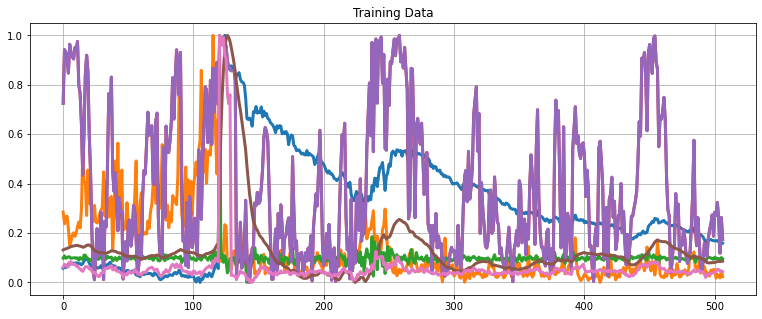

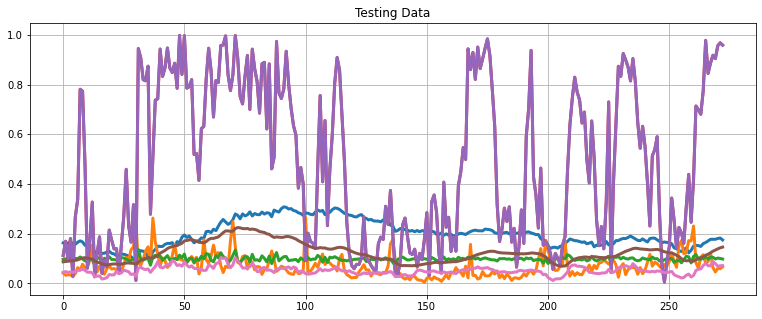

In [30]:
# Define a data plotting function
def show_plot(data, title):
    plt.figure(figsize = (13, 5))
    plt.plot(data, linewidth = 3)
    plt.title(title)
    plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [31]:
y

array([7.49405135e-02, 7.65184721e-02, 6.78772699e-02, 7.05072010e-02,
       6.83782091e-02, 6.29179712e-02, 7.57670632e-02, 8.82154039e-02,
       9.09705698e-02, 9.03694427e-02, 8.07263619e-02, 7.52160301e-02,
       6.30932999e-02, 5.25735755e-02, 5.08453350e-02, 5.52786475e-02,
       6.02379461e-02, 5.50031309e-02, 5.54539762e-02, 6.31433939e-02,
       6.03130870e-02, 4.94927990e-02, 6.05385097e-02, 5.65309956e-02,
       6.47463995e-02, 6.73262367e-02, 7.02066374e-02, 7.47651847e-02,
       6.29430182e-02, 6.04132749e-02, 6.27175955e-02, 5.35754540e-02,
       4.96305573e-02, 5.47526612e-02, 5.25234815e-02, 5.26988103e-02,
       3.74201628e-02, 3.89981215e-02, 4.10770194e-02, 3.74201628e-02,
       4.39323732e-02, 4.23544145e-02, 3.85973701e-02, 4.03256105e-02,
       4.06762680e-02, 3.97745773e-02, 3.05823419e-02, 2.44207890e-02,
       2.30181590e-02, 2.08641202e-02, 1.75579211e-02, 2.62993112e-02,
       2.95554164e-02, 2.80275517e-02, 3.14339386e-02, 3.37132123e-02,
      

In [32]:
X.shape

(780, 7)

In [33]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [34]:
regression_model.coef_


array([ 9.35171857e-01,  3.22259026e-01, -4.94661422e-02,  3.34484296e-02,
        3.34484296e-02, -9.25616692e-02,  7.64052178e-05])

In [35]:
regression_model.intercept_

-0.026874060261011745

In [36]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.7123225888394551


In [37]:
# high in both training and test

# difference between predicted and observed


predicted_prices = regression_model.predict(X)

In [38]:
predicted_prices

array([0.14986669, 0.15355604, 0.15999018, 0.16370629, 0.15167956,
       0.13614144, 0.14168281, 0.15013608, 0.15299539, 0.14989278,
       0.15686952, 0.16501126, 0.15831349, 0.14794922, 0.15970584,
       0.22243641, 0.20652433, 0.22890619, 0.19210469, 0.24593038,
       0.17038407, 0.16096171, 0.11791924, 0.09208936, 0.11287013,
       0.10259739, 0.10377778, 0.09827253, 0.11061616, 0.13341932,
       0.12495013, 0.15567245, 0.11539566, 0.17098289, 0.14389198,
       0.16404348, 0.18876504, 0.19103096, 0.09191558, 0.12144091,
       0.20633018, 0.13505254, 0.20871378, 0.11866377, 0.11571821,
       0.1685414 , 0.06860275, 0.08147193, 0.07582682, 0.11412081,
       0.09088353, 0.09150224, 0.07681167, 0.08258044, 0.09695055,
       0.12986837, 0.15765355, 0.02406007, 0.05411402, 0.09585679,
       0.11173993, 0.07735814, 0.08206887, 0.0857823 , 0.09401444,
       0.1174687 , 0.102986  , 0.12569679, 0.13066405, 0.13775952,
       0.16477243, 0.13610346, 0.1497379 , 0.1257852 , 0.07585

In [39]:
Predicted = []
for i in predicted_prices:
    Predicted.append(i)

In [40]:
len(Predicted)

780

In [41]:
data_dated

array([[0.05720902, 0.28490667, 0.09847248, ..., 0.13173127, 0.0616339 ,
        0.07494051],
       [0.06264473, 0.23753447, 0.10755963, ..., 0.13423024, 0.07353152,
        0.07651847],
       [0.06010969, 0.26613542, 0.09774161, ..., 0.13594589, 0.06848124,
        0.06787727],
       ...,
       [0.18054845, 0.06059474, 0.10168831, ..., 0.13883349, 0.06875034,
        0.16578585],
       [0.18240098, 0.05874787, 0.1000804 , ..., 0.14292399, 0.07067159,
        0.16378209],
       [0.1745521 , 0.06658681, 0.09774161, ..., 0.14583248, 0.07121803,
        0.16385723]])

In [42]:
close = []
for i in data_dated:
  close.append(i[-1])

In [43]:
len(close)

780

In [44]:
df_lstm=df_lstm.reset_index()

In [45]:
df_lstm.shape

(780, 10)

In [46]:
df_rnd= df_lstm[['date']]
# df_rnd['close']= close

In [47]:
# df_rnd.shape
# df_rnd = df_rnd[:-1]

In [48]:
 df_rnd['close']= close

<ipython-input-48-62fab02af385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rnd['close']= close


In [49]:
df_rnd['Prediction'] = Predicted


<ipython-input-49-5a893f5429a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rnd['Prediction'] = Predicted


In [50]:
df_rnd.head(10)

date     close  Prediction
0 2021-02-22  0.074941    0.149867
1 2021-02-19  0.076518    0.153556
2 2021-02-18  0.067877    0.159990
3 2021-02-17  0.070507    0.163706
4 2021-02-16  0.068378    0.151680
5 2021-02-12  0.062918    0.136141
6 2021-02-11  0.075767    0.141683
7 2021-02-10  0.088215    0.150136
8 2021-02-09  0.090971    0.152995
9 2021-02-08  0.090369    0.149893

In [51]:
import plotly.express as px
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [52]:
# Plot the results
interactive_plot(df_rnd, "Original Vs. Prediction")

In [53]:
residual= y-predicted_prices

In [54]:
print(residual)

[-7.49261772e-02 -7.70375691e-02 -9.21129133e-02 -9.31990897e-02
 -8.33013515e-02 -7.32234697e-02 -6.59157458e-02 -6.19206744e-02
 -6.20248244e-02 -5.95233356e-02 -7.61431587e-02 -8.97952316e-02
 -9.52201906e-02 -9.53756487e-02 -1.08860505e-01 -1.67157759e-01
 -1.46286381e-01 -1.73903063e-01 -1.36650713e-01 -1.82786989e-01
 -1.10070980e-01 -1.11468913e-01 -5.73807309e-02 -3.55583609e-02
 -4.81237295e-02 -3.52711569e-02 -3.35711421e-02 -2.35073489e-02
 -4.76731408e-02 -7.30060463e-02 -6.22325357e-02 -1.02097000e-01
 -6.57650986e-02 -1.16230227e-01 -9.13684936e-02 -1.11344672e-01
 -1.51344881e-01 -1.52032834e-01 -5.08385613e-02 -8.40207493e-02
 -1.62397812e-01 -9.26981290e-02 -1.70116413e-01 -7.83381546e-02
 -7.50419373e-02 -1.28766825e-01 -3.80204043e-02 -5.70511439e-02
 -5.28086610e-02 -9.32566926e-02 -7.33256096e-02 -6.52029263e-02
 -4.72562523e-02 -5.45528858e-02 -6.55166136e-02 -9.61551576e-02
 -1.26545220e-01  6.92301972e-03 -2.24296130e-02 -7.29889115e-02
 -8.79954139e-02 -4.76774

(array([  4.,  92., 615.,  59.,   0.,   0.,   0.,   0.,   5.,   5.]),
 array([-0.28785715, -0.17699185, -0.06612656,  0.04473874,  0.15560404,
         0.26646933,  0.37733463,  0.48819992,  0.59906522,  0.70993052,
         0.82079581]),
 <BarContainer object of 10 artists>)

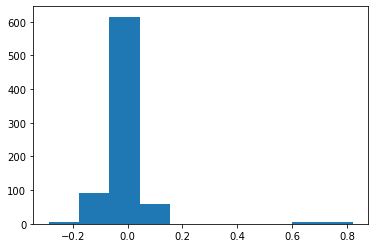

In [55]:
plt.hist(residual)

In [56]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_test, y_test);

In [57]:
df_lstm.head(50)

date  1. open    6. volume Ticker  change_in_price  k_percent  \
0  2021-02-22   128.01  102886922.0   AAPL            0.140  72.464841   
1  2021-02-19   130.24   87668834.0   AAPL            3.870  94.206897   
2  2021-02-18   129.20   96856748.0   AAPL           -0.160  93.103448   
3  2021-02-17   131.25   97372199.0   AAPL            1.130  91.380387   
4  2021-02-16   135.49   80576316.0   AAPL            2.350  84.707158   
5  2021-02-12   134.35   60145130.0   AAPL            2.180  96.367764   
6  2021-02-11   135.90   64280029.0   AAPL           -0.240  93.000000   
7  2021-02-10   136.48   72647988.0   AAPL            0.260  91.397849   
8  2021-02-09   136.62   75986989.0   AAPL            0.620  90.419254   
9  2021-02-08   136.03   71297214.0   AAPL            0.900  95.037717   
10 2021-02-05   137.35   75693830.0   AAPL           -0.150  94.267974   
11 2021-02-04   136.30   84183061.0   AAPL            0.630  97.500898   
12 2021-02-03   135.76   89880937.0   AAPL           -3.450  79.796788   
13 2021-02-02   135.73   82266419.0   AAPL            1.050  76.484483   
14 2021-02-01   133.75  106239823.0   AAPL           -0.850  64.297315   
15 2021-01-29   135.83  177523812.0   AAPL           -2.180  43.469953   
16 2021-01-28   139.52  142621128.0   AAPL            5.130  60.862620   
17 2021-01-27   143.43  140843759.0   AAPL            4.970  84.102200   
18 2021-01-26   143.60   98390555.0   AAPL            1.100  91.909155   
19 2021-01-25   143.07  157611713.0   AAPL           -0.240  85.416667   
20 2021-01-22   136.28  114459360.0   AAPL           -3.850  59.543011   
21 2021-01-21   133.80  120529544.0   AAPL           -2.200  44.758065   
22 2021-01-20   128.66  104319489.0   AAPL           -4.840  21.039903   
23 2021-01-19   127.78   90757329.0   AAPL           -4.200   4.914059   
24 2021-01-15   128.78  111598531.0   AAPL           -0.690   1.112825   
25 2021-01-14   130.80   90221755.0   AAPL            1.770  10.863817   
26 2021-01-13   128.76   88636831.0   AAPL            1.980  21.771706   
27 2021-01-12   128.50   90440255.0   AAPL           -2.090  10.641799   
28 2021-01-11   129.19  100620880.0   AAPL            0.180  11.629183   
29 2021-01-08   132.43  105158245.0   AAPL            3.070  28.469556   
30 2021-01-07   128.36  109578157.0   AAPL           -1.130  22.270982   
31 2021-01-06   127.72  155087970.0   AAPL           -4.320   1.165277   
32 2021-01-05   128.89   97664898.0   AAPL            4.410  24.738080   
33 2021-01-04   133.52  143301887.0   AAPL           -1.600  22.482922   
34 2020-12-31   134.08   99116586.0   AAPL            3.280  47.471403   
35 2020-12-30   135.58   96452124.0   AAPL            1.030  76.373855   
36 2020-12-29   138.05  121047324.0   AAPL            1.150  68.412993   
37 2020-12-28   133.99  123124632.0   AAPL            1.820  83.082131   
38 2020-12-24   131.32   54930064.0   AAPL           -4.720  45.039091   
39 2020-12-23   132.16   88223692.0   AAPL           -1.010  36.898525   
40 2020-12-22   131.61  169351825.0   AAPL            0.920  44.313694   
41 2020-12-21   125.02  121251553.0   AAPL           -3.650  31.166884   
42 2020-12-18   128.96  192541496.0   AAPL           -1.575  20.899609   
43 2020-12-17   128.90   94359811.0   AAPL            2.045  34.230769   
44 2020-12-16   127.41   98208591.0   AAPL           -0.890  28.428944   
45 2020-12-15   124.34  157572262.0   AAPL            0.070  28.885267   
46 2020-12-14   122.60   79075988.0   AAPL           -6.100   1.391385   
47 2020-12-11   122.43   86939786.0   AAPL            0.630  10.197928   
48 2020-12-10   120.50   81312170.0   AAPL            0.830  16.578143   
49 2020-12-09   124.53  115089193.0   AAPL           -1.460   8.745104   

    r_percent      MACD  Price_Rate_Of_Change   Target  
0  -27.535159  0.630229              0.037720  136.760  
1   -5.793103  0.925558              0.081079  137.390  
2   -6.896552  1.128316              0.062674  133.940  
3   -8

In [58]:

training_data = df_lstm.head.iloc[:, :-1].values


AttributeError: 'function' object has no attribute 'iloc'